In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv

--2020-09-15 15:56:28--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2180 (2.1K) [text/plain]
Saving to: ‘airline-passengers.csv’

airline-passengers. 100%[===================>]   2.13K  --.-KB/s    in 0s      

2020-09-15 15:56:28 (46.9 MB/s) - ‘airline-passengers.csv’ saved [2180/2180]



In [ ]:
df = pd.read_csv("/content/airline-passengers.csv")

In [ ]:
df.iloc[1:10,1]

1    118
2    132
3    129
4    121
5    135
6    148
7    148
8    136
9    119
Name: Passengers, dtype: int64

In [ ]:
import matplotlib.pyplot as plt

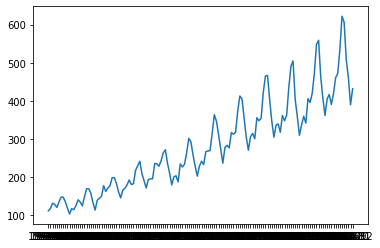

In [ ]:
plt.plot(df["Month"],df["Passengers"])

In [ ]:
df["year"] = df["Month"].apply(lambda x : float(x.split("-")[0]))
df["month"] = df["Month"].apply(lambda x : float(x.split("-")[1]))

In [ ]:
date = df["Month"]
df.drop("Month",axis=1,inplace=True)

In [ ]:
train = df.iloc[:int(len(df)*0.75)]

In [ ]:
test = df.iloc[108:]

In [ ]:
X_train,Y_train = train.drop("Passengers",axis=1),train["Passengers"]

In [ ]:
X_test,Y_test = test.drop("Passengers",axis=1),test["Passengers"]

In [ ]:
Y_train.shape

(108,)

In [ ]:
Y_train.values

In [ ]:
Y_train = np.array(Y_train).reshape(-1,1)
Y_test = np.array(Y_test).reshape(-1,1)

In [ ]:
Y_train

In [ ]:
X_test.shape

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [ ]:
sc = MinMaxScaler()
Y_train = sc.fit_transform(Y_train)
Y_test  = sc.transform(Y_test)

In [ ]:
X_train = np.reshape(np.array(X_train),(X_train.shape[0],1,X_train.shape[1]))
X_test = np.reshape(np.array(X_test),(X_test.shape[0],1,X_test.shape[1]))

In [ ]:
from keras.layers import LSTM,Dense
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(5,activation="relu",return_sequences=True))
model.add(LSTM(10,activation="relu"))
model.add(Dense(1,activation="relu"))

In [ ]:
model.compile(loss="mean_squared_error",optimizer="adam",metrics=["mae"])

In [ ]:
model.fit(X_train,Y_train,epochs=100,batch_size=10)

Epoch 1/100
11/11 [==============================] - 0s 7ms/step - loss: 0.1699 - mae: 0.3378
Epoch 2/100
11/11 [==============================] - 0s 6ms/step - loss: 0.1582 - mae: 0.3215
Epoch 3/100
11/11 [==============================] - 0s 6ms/step - loss: 0.1475 - mae: 0.3059
Epoch 4/100
11/11 [==============================] - 0s 6ms/step - loss: 0.1369 - mae: 0.2907
Epoch 5/100
11/11 [==============================] - 0s 6ms/step - loss: 0.1262 - mae: 0.2756
Epoch 6/100
11/11 [==============================] - 0s 6ms/step - loss: 0.1163 - mae: 0.2624
Epoch 7/100
11/11 [==============================] - 0s 6ms/step - loss: 0.1064 - mae: 0.2489
Epoch 8/100
11/11 [==============================] - 0s 7ms/step - loss: 0.0970 - mae: 0.2364
Epoch 9/100
11/11 [==============================] - 0s 7ms/step - loss: 0.0882 - mae: 0.2246
Epoch 10/100
11/11 [==============================] - 0s 7ms/step - loss: 0.0800 - mae: 0.2154
Epoch 11/100
11/11 [==============================] - 0s 6m

In [ ]:
model.evaluate(X_test,Y_test)

2/2 [==============================] - 0s 4ms/step - loss: 0.0389 - mae: 0.1536


[0.0389266200363636, 0.1535976380109787]

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(Y_test,model.predict(X_test))

0.16164340383380882

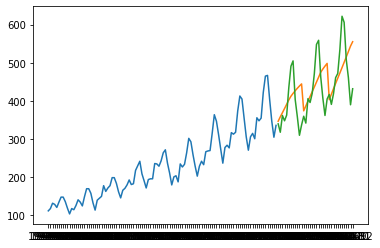

In [ ]:
plt.plot(date.iloc[:len(train)],train["Passengers"])
plt.plot(date.iloc[len(train):],sc.inverse_transform(model.predict(X_test)))
plt.plot(date.iloc[len(train):],sc.inverse_transform(Y_test))

In [ ]:
df

NameError: ignored